In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('coordinate/mediapipe.csv')
df = pd.DataFrame()

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.655398,0.754996,0.732876,0.622800,0.501697,0.573722,0.542698,0.520100,0.488798,0.493754,...,-0.050929,-0.069202,-0.018613,-0.164160,-0.198194,-0.177343,-0.075523,-0.216604,-0.254290,-0.263610
1,0.615262,0.635260,0.566675,0.445580,0.362390,0.604250,0.551677,0.510508,0.472861,0.539292,...,-0.070668,-0.100939,0.051584,-0.046041,-0.085065,-0.074933,0.093699,0.002715,-0.031852,-0.033397
2,0.585880,0.689233,0.654418,0.490062,0.349746,0.558598,0.524567,0.498928,0.467499,0.450383,...,-0.082209,-0.100583,-0.012767,-0.171432,-0.226264,-0.216911,-0.021432,-0.187490,-0.247943,-0.259125
3,0.560909,0.703391,0.791008,0.860329,0.935539,0.635312,0.684154,0.708878,0.721842,0.518966,...,-0.206435,-0.240816,-0.124195,-0.190119,-0.264931,-0.313222,-0.147622,-0.234238,-0.299027,-0.347374
4,0.543837,0.376022,0.281452,0.199659,0.130539,0.448407,0.422512,0.414993,0.413138,0.556247,...,-0.076064,-0.091440,0.003922,-0.000914,-0.014615,-0.021281,0.049759,0.057434,0.051290,0.043083
5,0.889086,0.763663,0.629531,0.500772,0.398205,0.557333,0.363366,0.248630,0.164587,0.596313,...,-0.094200,-0.109928,0.015155,0.006668,-0.012128,-0.030290,0.082947,0.083766,0.071956,0.060449
6,0.568423,0.387559,0.281210,0.194007,0.102762,0.406766,0.382472,0.373322,0.370984,0.521865,...,-0.058377,-0.057427,-0.047067,0.025435,0.126242,0.186723,-0.037977,0.015279,0.058134,0.084898
7,0.553176,0.708047,0.772286,0.788219,0.810323,0.602299,0.635977,0.643785,0.639722,0.484316,...,-0.143299,-0.195234,-0.018502,-0.167995,-0.217323,-0.206535,-0.051294,-0.130049,-0.144369,-0.143703
8,0.736758,0.822178,0.795169,0.739006,0.718587,0.549218,0.452655,0.391389,0.333689,0.470516,...,-0.021451,-0.046830,0.032347,-0.085409,-0.134043,-0.122577,0.039712,0.008666,0.000131,0.000444
9,0.550365,0.446135,0.400133,0.369390,0.336344,0.498635,0.474762,0.461396,0.452813,0.550038,...,0.108474,0.120287,-0.010580,-0.001377,-0.006718,-0.016310,-0.090925,-0.106871,-0.134092,-0.153933


In [3]:
# 벡터로 변환

vector_columnList = ['v0->1', 'v1->2', 'v2->3', 'v3->4', 'v0->5', 'v5->6', 'v6->7', 'v7->8', 'v0->9', 'v9->10',
                    'v10->11', 'v11->12', 'v0->13', 'v13->14', 'v14->15', 'v15->16', 'v0->17', 'v17->18', 'v18->19','v19->20']
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20]]

vector_data = []
for c, v in zip(vector_columnList, vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)

In [6]:
degree_list = [[0,1], [1,2], [2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14], [14,15], [16,17], [17,18], [18,19]]
result = pd.DataFrame()
for d in degree_list:
    a=vector_data[d[0]].x*vector_data[d[1]].x+vector_data[d[0]].y*vector_data[d[1]].y+vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2+vector_data[d[0]].y**2+vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2+vector_data[d[1]].y**2+vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

label = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4]

result

,vec0-1,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,0.898444,0.711983,0.697623,0.532396,0.127367,0.295750,0.453858,0.151844,0.149294,0.817504,1.910975,0.551908,1.082375,1.571491,0.482676
1,1.036661,0.583605,0.366188,0.295954,0.099381,0.100123,0.330972,0.272297,0.128982,1.308164,1.524787,0.717326,1.400461,1.459513,0.606418
2,0.958006,0.936025,0.392153,0.251204,0.239471,0.169989,0.307161,0.037002,0.059482,0.972661,1.767101,0.486518,1.118550,1.447240,0.378444
3,0.511791,0.014366,0.371971,0.132353,0.117279,0.147586,0.061151,0.155946,0.096610,0.137385,0.228437,0.126753,0.237871,0.047886,0.144838
4,0.477041,0.084704,0.110079,0.168193,0.104521,0.152021,0.169745,0.130922,0.088458,0.139297,0.147537,0.057290,0.255132,0.182280,0.089272
5,0.404049,0.089694,0.098993,0.122177,0.149203,0.081894,0.017232,0.084354,0.069471,0.135181,0.140612,0.049826,0.375833,0.266257,0.085339
6,0.737080,0.194573,0.301475,0.380723,0.055544,0.103911,0.145818,0.195468,0.060949,0.680580,1.404328,0.304905,0.567610,0.118647,0.133086
7,0.752002,0.318291,0.147137,0.156613,0.280560,0.156001,0.456850,0.383663,0.153275,0.921786,1.702124,0.625525,0.509096,0.349333,0.254820
8,0.919896,0.247910,0.245169,0.089766,0.171537,0.116824,0.067352,0.320453,0.065997,1.108243,1.420831,0.710532,0.357034,0.137964,0.191635
9,0.605953,0.284473,0.200032,0.307670,0.077882,0.339769,0.083691,0.101226,0.120776,0.204819,0.231994,0.088742,0.616814,0.342982,0.108089


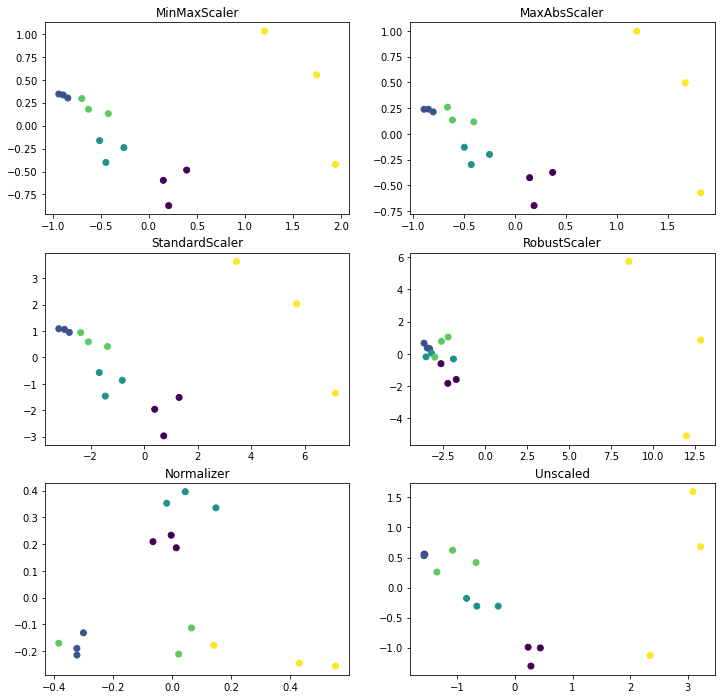

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

MM = MinMaxScaler()
MA = MaxAbsScaler()
SS = StandardScaler()
RS = RobustScaler()
NO = Normalizer()

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정

plt.figure(figsize=(12, 12))

plt.subplot(321)
df = pd.DataFrame(data=pca.fit_transform(MM.fit_transform(result)), columns=['x','y'])
plt.scatter(df.x, df.y, c=label)
plt.title('MinMaxScaler')

plt.subplot(322)
df = pd.DataFrame(data=pca.fit_transform(MA.fit_transform(result)), columns=['x','y'])
plt.scatter(df.x, df.y, c=label)
plt.title('MaxAbsScaler')

plt.subplot(323)
df = pd.DataFrame(data=pca.fit_transform(SS.fit_transform(result)), columns=['x','y'])
plt.scatter(df.x, df.y, c=label)
plt.title('StandardScaler')

plt.subplot(324)
df = pd.DataFrame(data=pca.fit_transform(RS.fit_transform(result)), columns=['x','y'])
plt.scatter(df.x, df.y, c=label)
plt.title('RobustScaler')

plt.subplot(325)
df = pd.DataFrame(data=pca.fit_transform(NO.fit_transform(result)), columns=['x','y'])
plt.scatter(df.x, df.y, c=label)
plt.title('Normalizer')

plt.subplot(326)
df = pd.DataFrame(data=pca.fit_transform(result), columns=['x','y'])
plt.scatter(df.x, df.y, c=label)
plt.title('Unscaled')

plt.show()